The ephemeris data is provided as a plain text file with much more info in it that we need. Extract the relevant info.

Calculate distance and angle and make a polar plot. [This guide](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html#sphx-glr-gallery-pie-and-polar-charts-polar-bar-py) shows how including how to map something to bar width.

Make this into a space infographic following [this guide](https://towardsdatascience.com/create-an-infographic-using-matplotlib-3fbb546c1628)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# import PIL
import datetime

%load_ext rpy2.ipython
from rpy2.robjects import r

C:\Users\david\Miniconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [2]:
os.chdir("../data")

In [3]:
def load_ephemeris(filepath):
    """Load HORIZONS ephemeris data into pandas dataframe"""

    #Read in ephemeris file
    with open(filepath, "r") as ephemeris:
        lines = ephemeris.readlines()

    #Get line number with start and end of ephemeris symbol
    start = [i for i,line in enumerate(lines) if "$$SOE" in line][0]
    end = [i for i,line in enumerate(lines) if "$$EOE" in line][0]

    # Get column names as two lines before start of ephemeris data
    columns = lines[start-2].split(",")
    columns = [name.strip() for name in columns]
    columns

    # Read the lines between start and end of ephemeris symbols
    # use identified columns as column names
    ephemeris = pd.read_csv(filepath,
                skiprows=start+1, skipfooter=len(lines)-end,
               header=None, names=columns)
    
    return ephemeris

In [4]:
mercury = load_ephemeris("test/mercury.txt")
venus = load_ephemeris("test/venus.txt")

mars = load_ephemeris("test/mars.txt")
jupiter = load_ephemeris("test/jupiter.txt")
saturn = load_ephemeris("test/saturn.txt")
uranus = load_ephemeris("test/uranus.txt")
neptune = load_ephemeris("test/neptune.txt")
pluto = load_ephemeris("test/pluto.txt")

planets = [mercury, venus, mars, jupiter, saturn, uranus, neptune, pluto]

C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [5]:
mercury = load_ephemeris("mercury.15")
venus = load_ephemeris("venus.15")

mars = load_ephemeris("mars.15")
jupiter = load_ephemeris("jupiter.15")
saturn = load_ephemeris("saturn.15")
uranus = load_ephemeris("uranus.15")
neptune = load_ephemeris("neptune.15")
pluto = load_ephemeris("pluto.15")

planets = [mercury, venus, mars, jupiter, saturn, uranus, neptune, pluto]

C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [6]:
masses = pd.read_csv("planet_masses.csv")

In [7]:
(mercury.Y/mercury.X).apply(math.atan)

mercury.apply(lambda x: np.sqrt((x.X**2) + (x.Y**2)), axis=1)

0       1.006141
1       1.020877
2       1.035511
3       1.050034
4       1.064433
          ...   
1457    0.894776
1458    0.866847
1459    0.839540
1460    0.813058
1461    0.787592
Length: 1462, dtype: float64

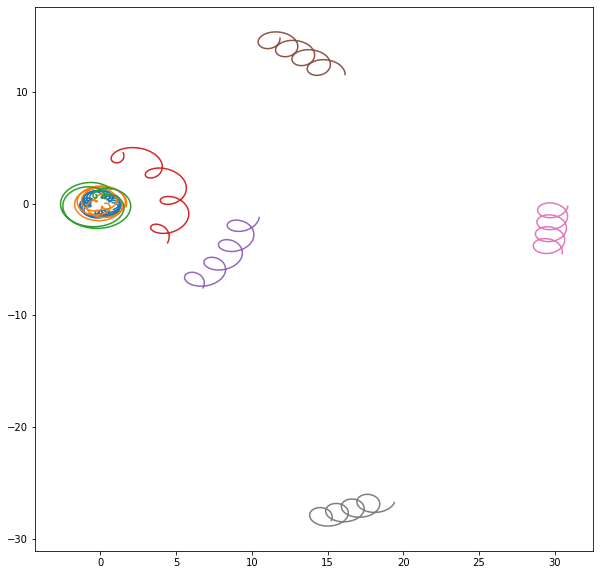

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
for df in planets:
    plt.plot(df.X, df.Y)

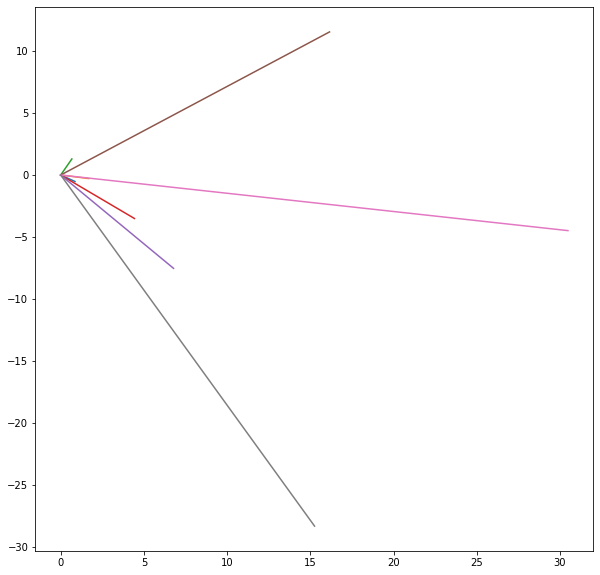

In [9]:
plt.rcParams["figure.figsize"] = (10,10)
for df in planets:
    plt.plot([0, df.X[0]], [0, df.Y[0]])

C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


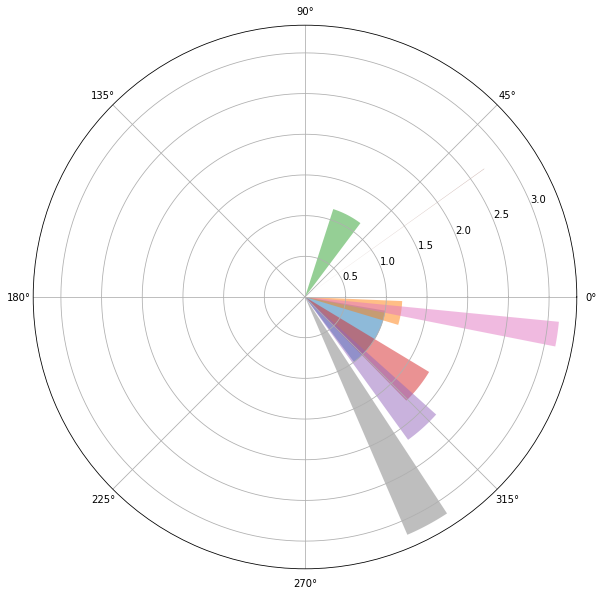

In [10]:
plt.rcParams["figure.figsize"] = (10,10)
i = 0
for df in planets:
    #Get bearing angle
    theta = df.apply(lambda x: math.atan(x.Y/x.X) if x.X >= 0 else (math.atan(x.Y/x.X) - np.pi), axis=1)
    # Get xy distance
    distance = df.apply(lambda x: np.sqrt((x.X**2) + (x.Y**2)), axis=1)

    ax = plt.subplot(111, projection="polar")
    ax.bar(theta[i], np.cbrt(distance[i]), width=df.VX[i]*np.pi*10, alpha=0.5)

In [11]:
df

,JDTDB,Calendar Date (TDB),X,Y,Z,VX,VY,VZ,LT,RG,RR,
0,2459286.5,A.D. 2021-Mar-13 00:00:00.0000,15.254270,-28.350603,-13.160013,0.005545,0.016833,0.006216,0.200871,34.779813,-0.013641,NaN
1,2459287.5,A.D. 2021-Mar-14 00:00:00.0000,15.259633,-28.333922,-13.153792,0.005234,0.016859,0.006227,0.200793,34.766216,-0.013798,NaN
2,2459288.5,A.D. 2021-Mar-15 00:00:00.0000,15.264688,-28.317217,-13.147555,0.004924,0.016882,0.006248,0.200713,34.752463,-0.013957,NaN
3,2459289.5,A.D. 2021-Mar-16 00:00:00.0000,15.269439,-28.300488,-13.141295,0.004622,0.016909,0.006272,0.200633,34.738552,-0.014116,NaN
4,2459290.5,A.D. 2021-Mar-17 00:00:00.0000,15.273895,-28.283731,-13.135014,0.004327,0.016937,0.006287,0.200552,34.724485,-0.014270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2460743.5,A.D. 2025-Mar-09 00:00:00.0000,19.385753,-26.814784,-13.936462,0.006550,0.016910,0.006265,0.207362,35.903552,-0.011524,NaN
1458,2460744.5,A.D. 2025-Mar-10 00:00:00.0000,19.392112,-26.798015,-13.930184,0.006244,0.016955,0.006293,0.207295,35.892028,-0.011727,NaN
1459,2460745.5,A.D. 2025-Mar-11 00:00:00.0000,19.398170,-26.781200,-13.923875,0.005944,0.017002,0.006326,0.207227,35.880301,-0.011932,NaN
1460,2460746.5,A.D. 2025-Mar-12 00:00:00.0000,19.403936,-26.764337,-13.917534,0.005653,0.017053,0.006354,0.207158,35.868373,-0.012132,NaN


In [12]:
test = pd.DataFrame({'X':[0,1,1,1,0,-1,-1,-1],
                    'Y':[1,1,0,-1,-1,-1,0,1]})

test['theta'] = test.apply(lambda x: math.atan(x.Y/x.X), axis=1)
test['theta2'] = test.apply(lambda x: math.atan(x.Y/x.X) if x.X >= 0 else (math.atan(x.Y/x.X) - np.pi), axis=1)
# test['theta2'] = test.apply(lambda x: len(x), axis=1)
test['distance'] = test.apply(lambda x: np.sqrt((x.X**2) + (x.Y**2)), axis=1)

test

C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in longlong_scalars
  after removing the cwd from sys.path.
C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


,X,Y,theta,theta2,distance
0,0,1,1.570796,1.570796,1.000000
1,1,1,0.785398,0.785398,1.414214
2,1,0,0.000000,0.000000,1.000000
3,1,-1,-0.785398,-0.785398,1.414214
4,0,-1,-1.570796,-1.570796,1.000000
5,-1,-1,0.785398,-2.356194,1.414214
6,-1,0,-0.000000,-3.141593,1.000000
7,-1,1,-0.785398,-3.926991,1.414214


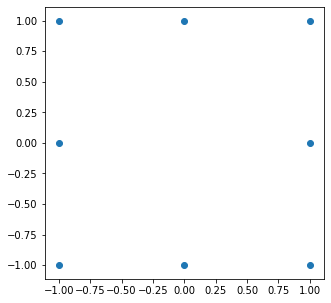

In [13]:
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(test.X, test.Y)

<BarContainer object of 8 artists>

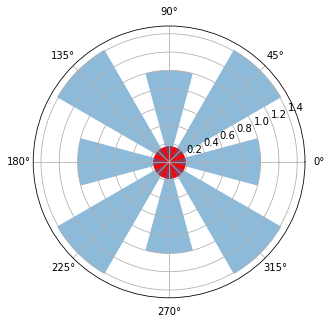

In [14]:
ax = plt.subplot(111, projection="polar")
ax.scatter(0,0, color="red", alpha=1, s =999)
ax.bar(test.theta2, test.distance, width=np.pi/6, alpha=0.5)


# Format plot

In [15]:
planetary_colours = [
    "#828585",
    "#e68c7c",
    
    "#e34057",
    "#fd8f24",
    "#FFE700",
    "#37f4dd",
    "#018aee",
    "#f8eed1"
]

C:\Users\david\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


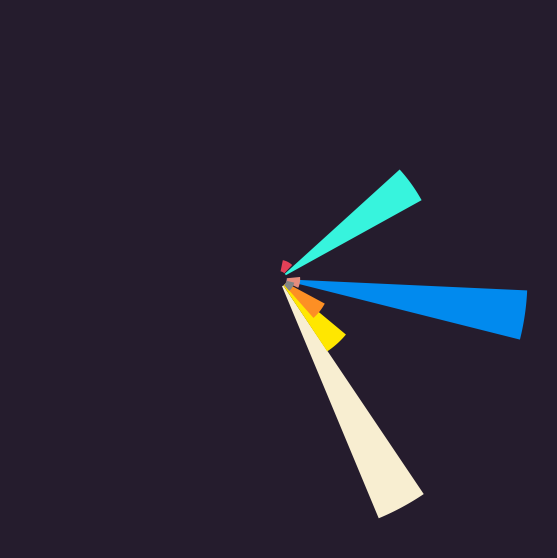

In [16]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rc('grid', linewidth=0)
# plt.rcParams.update({"font.size": 0})

fig=plt.figure()
fig.patch.set_facecolor("#251c2d")

dateno = 0
for i, df in enumerate(planets):
    #Get bearing angle
    theta = df.apply(lambda x: math.atan(x.Y/x.X) if x.X >= 0 else (math.atan(x.Y/x.X) - np.pi), axis=1)
    # Get xy distance
    distance = df.apply(lambda x: np.sqrt((x.X**2) + (x.Y**2)), axis=1)

    ax = fig.add_subplot(111, projection="polar", facecolor="#251c2d")
    ax.axis('off')
    ax.spines['polar'].set_visible(False)
    #Fixed area of bars (ignoring curvature)
    fab = np.pi/10
    ax.bar(theta[dateno], np.cbrt(distance[dateno]), width=2*fab/np.cbrt(distance[dateno]), #(np.pi/3)/(np.cbrt(distance[dateno])**1.5),
           color=planetary_colours[i], alpha=1, edgecolor="None",
          bottom=1, zorder=1/distance[dateno]
          )
#     ax.scatter(0,0, s=999, color="#251c2d", zorder=10)

    

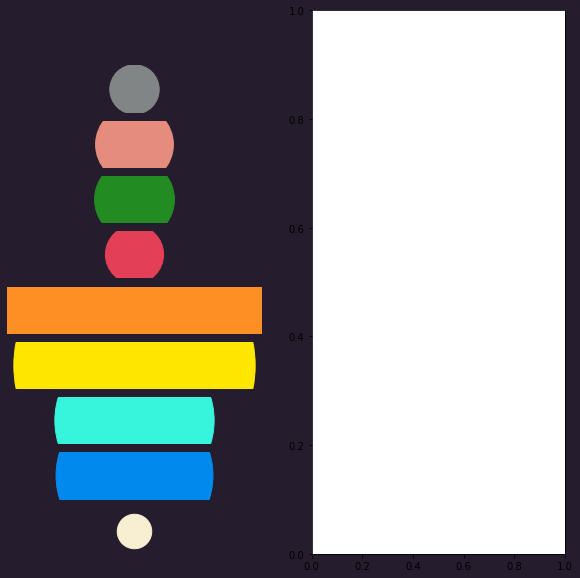

In [19]:
masses = pd.read_csv("planet_masses.csv")

planetary_colours9 = planetary_colours.copy()
planetary_colours9.insert(2, "forestgreen")

fig = plt.figure()
fig.patch.set_facecolor("#251c2d")

# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=10, ncols=2)
ax = []
ax.append(fig.add_subplot(gs[:,1]))
for i in range(9):
    ax.append(fig.add_subplot(gs[i+1,0], facecolor="#251c2d"))
    ax[-1].axis('off')
    ax[-1].scatter(0,0, color=planetary_colours9[i], 
                  # s=masses['Mass (kg)'][i]/1e23
                   s=masses['Vol. Mean Radius (km)'][i]
                  )
    

In [83]:
df

,JDTDB,Calendar Date (TDB),X,Y,Z,VX,VY,VZ,LT,RG,RR,
0,2459286.5,A.D. 2021-Mar-13 00:00:00.0000,15.254270,-28.350603,-13.160013,0.005545,0.016833,0.006216,0.200871,34.779813,-0.013641,NaN
1,2459287.5,A.D. 2021-Mar-14 00:00:00.0000,15.259633,-28.333922,-13.153792,0.005234,0.016859,0.006227,0.200793,34.766216,-0.013798,NaN
2,2459288.5,A.D. 2021-Mar-15 00:00:00.0000,15.264688,-28.317217,-13.147555,0.004924,0.016882,0.006248,0.200713,34.752463,-0.013957,NaN
3,2459289.5,A.D. 2021-Mar-16 00:00:00.0000,15.269439,-28.300488,-13.141295,0.004622,0.016909,0.006272,0.200633,34.738552,-0.014116,NaN
4,2459290.5,A.D. 2021-Mar-17 00:00:00.0000,15.273895,-28.283731,-13.135014,0.004327,0.016937,0.006287,0.200552,34.724485,-0.014270,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2460743.5,A.D. 2025-Mar-09 00:00:00.0000,19.385753,-26.814784,-13.936462,0.006550,0.016910,0.006265,0.207362,35.903552,-0.011524,NaN
1458,2460744.5,A.D. 2025-Mar-10 00:00:00.0000,19.392112,-26.798015,-13.930184,0.006244,0.016955,0.006293,0.207295,35.892028,-0.011727,NaN
1459,2460745.5,A.D. 2025-Mar-11 00:00:00.0000,19.398170,-26.781200,-13.923875,0.005944,0.017002,0.006326,0.207227,35.880301,-0.011932,NaN
1460,2460746.5,A.D. 2025-Mar-12 00:00:00.0000,19.403936,-26.764337,-13.917534,0.005653,0.017053,0.006354,0.207158,35.868373,-0.012132,NaN


In [ ]:
# Get today's date in the same calendar date format
calendarDateToday = datetime.datetime.now().strftime("%Y-%b-%d")

In [87]:
istoday = df['Calendar Date (TDB)'].str.contains(calendarDateToday)

#Use as dateno
# Get the first occurence of True
dateno = istoday.idxmax()

0

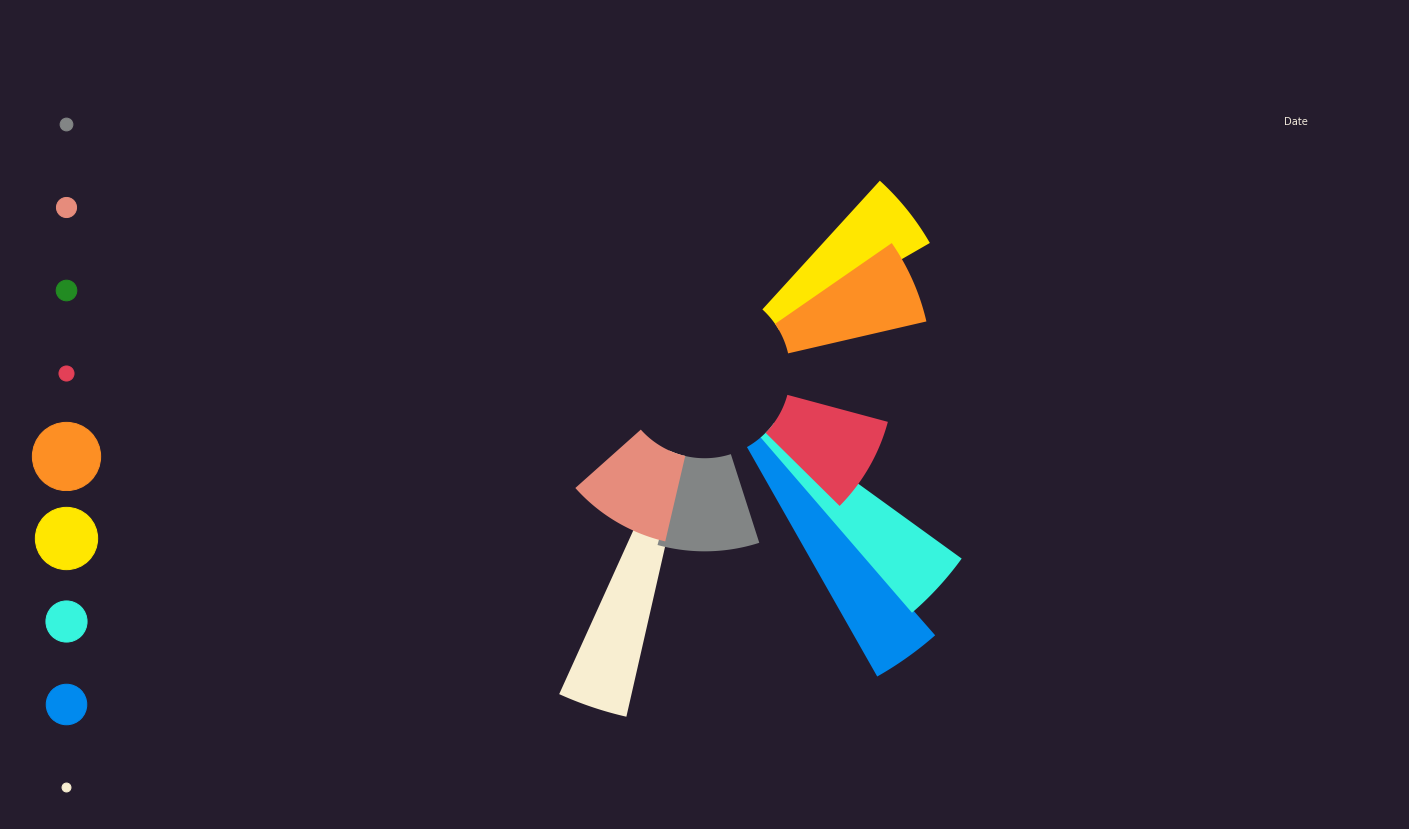

In [37]:
fig = plt.figure()
fig.patch.set_facecolor("#251c2d")

# Use GridSpec for customising layout
gs = fig.add_gridspec(nrows=10, ncols=10)
ax = []

# # Title
# ax.append(fig.add_subplot(gs[0,4:6]))
# ax[-1].axis('off')
# #font = {'fontname':'Times New Roman'}
# ax[-1].text(0,0.5,"Solar Wind Rose", color="#f0e8da",
#            fontsize=20,# **font
#            )

# date
ax.append(fig.add_subplot(gs[1,9]))
ax[-1].axis('off')
#font = {'fontname':'Times New Roman'}
ax[-1].text(0,0.5,"Date", color="#f0e8da",
           fontsize=10,# **font
           )

#Wind rose
ax.append(fig.add_subplot(gs[0:9,1:9], projection="polar", facecolor="#251c2d"))
# plt.rcParams["figure.figsize"] = (10,10)
# plt.rc('grid', linewidth=0)
# plt.rcParams.update({"font.size": 0})

# fig=plt.figure()
# fig.patch.set_facecolor("#251c2d")

#Calculate distance and angle
dateno = 0
for i, df in enumerate(planets):
    #Get bearing angle
    theta = df.apply(lambda x: math.atan(x.Y/x.X) if x.X >= 0 else (math.atan(x.Y/x.X) - np.pi), axis=1)
    # Get xy distance
    distance = df.apply(lambda x: np.sqrt((x.X**2) + (x.Y**2)), axis=1)

#     ax = fig.add_subplot(111, projection="polar", facecolor="#251c2d")
    ax[-1].spines['polar'].set_visible(False)
    ax[-1].axis('off')
    #Fixed area of bars (ignoring curvature)
    fab = np.pi/10
    ax[-1].bar(theta[dateno], np.cbrt(distance[dateno]), width=2*fab/np.cbrt(distance[dateno]), #(np.pi/3)/(np.cbrt(distance[dateno])**1.5),
           color=planetary_colours[i], alpha=1, edgecolor="None",
          bottom=1, zorder=1/distance[dateno]
          )

#Planet size side bar
for i in range(9):
    ax.append(fig.add_subplot(gs[i+1,0], facecolor="#251c2d"))
    ax[-1].axis('off')
    ax[-1].scatter(0,0, color=planetary_colours9[i], 
                  # s=masses['Mass (kg)'][i]/1e23
                   s=masses['Vol. Mean Radius (km)'][i]/15
                  )

fig.set_size_inches(25,15)
plt.savefig("solarWindRose.png", facecolor=fig.get_facecolor(), edgecolor="none", dpi=300)

In [38]:
# #Apparently older versions needed the image to be a png
# image = PIL.Image.open("solarWindRose.png")
# image.save("solarWindRose.bmp")

In [39]:
import ctypes

ctypes.windll.user32.SystemParametersInfoW(20, 0, "C:/Users/david/OneDrive/projects/solarWindRose/data/solarWindRose.png", 3)

1

# To do
- desaturate colours
